In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uint8


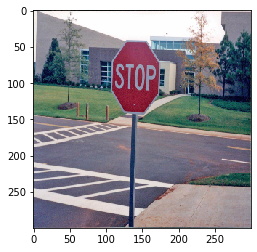

In [44]:
frame = mpimg.imread('stop-street-sign.jpg')
frame_resized = cv2.resize(image, (300,300))
cols = frame_resized.shape[1] 
rows = frame_resized.shape[0]
plt.imshow(frame_resized)
print(frame_resized.dtype)

In [22]:
net = cv2.dnn.readNetFromCaffe('MobileNetSSD_deploy.prototxt', 'MobileNetSSD_deploy.caffemodel')

In [27]:
input = cv2.dnn.blobFromImage(image, 0.007843, (300, 300), (127.5, 127.5, 127.5), False)

In [31]:
net.setInput(input)
# perform inference and get output
detections = net.forward() 

In [32]:
detections.shape

(1, 1, 100, 7)

In [42]:
detections[0, 0, 0]

array([ 0.        , 16.        ,  0.3678203 ,  0.83104014,  0.06447567,
        0.99852395,  0.43084288], dtype=float32)

In [36]:
classNames = { 0: 'background',
    1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',
    5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair',
    10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse',
    14: 'motorbike', 15: 'person', 16: 'pottedplant',
    17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor' }

In [49]:
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2] #Confidence of prediction 
    if confidence > 0.3: # Filter prediction 
        class_id = int(detections[0, 0, i, 1]) # Class label

        # Object location 
        xLeftBottom = int(detections[0, 0, i, 3] * cols) 
        yLeftBottom = int(detections[0, 0, i, 4] * rows)
        xRightTop   = int(detections[0, 0, i, 5] * cols)
        yRightTop   = int(detections[0, 0, i, 6] * rows)

        # Factor for scale to original size of frame
        heightFactor = frame.shape[0]/300.0  
        widthFactor = frame.shape[1]/300.0 
        # Scale object detection to frame
        xLeftBottom = int(widthFactor * xLeftBottom) 
        yLeftBottom = int(heightFactor * yLeftBottom)
        xRightTop   = int(widthFactor * xRightTop)
        yRightTop   = int(heightFactor * yRightTop)
        # Draw location of object  
        cv2.rectangle(frame, (xLeftBottom, yLeftBottom), (xRightTop, yRightTop),
                      (0, 255, 0), 5)

        # Draw label and confidence of prediction in frame resized
        if class_id in classNames:
            label = classNames[class_id] + ": " + str(confidence)
            labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)

            yLeftBottom = max(yLeftBottom, labelSize[1])
            cv2.rectangle(frame, (xLeftBottom, yLeftBottom - labelSize[1]),
                                 (xLeftBottom + labelSize[0], yLeftBottom + baseLine),
                                 (255, 255, 255), cv2.FILLED)
            cv2.putText(frame, label, (xLeftBottom, yLeftBottom),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0))

            print(label) #print class and confidence

pottedplant: 0.3678203


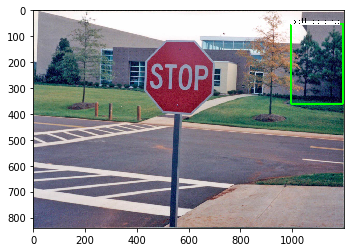

In [50]:
plt.imshow(frame)